In [2]:
import numpy as np
import pyvinecopulib as pv
from matplotlib import pyplot as plt
import itertools

In [3]:
seed = list(np.arange(0.1,0.91,0.1))

In [4]:
out1 = []
out2 = []
for x,y,z in list(itertools.product(seed,seed,seed)):
    cop = pv.Vinecop(
        structure=pv.CVineStructure(order=[1,2,3]), 
        pair_copulas=[
            [
                pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[[x]]), 
                pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[[y]])
            ],
            [
                pv.Bicop(family=pv.BicopFamily.gaussian, parameters=[[z]])
            ]
        ]
    )
    U = cop.simulate(n=1000, seeds=[1,2,3])
    
    w = np.random.uniform(size=1000)[:, None]
    
    F_2_3 = cop.get_pair_copula(0,1).hfunc2(np.hstack([U[:,1][:, None], U[:,2][:, None]]))[:, None]
    inv1 = cop.get_pair_copula(1,0).hinv2(np.hstack([w, F_2_3]))[:, None]
    u1_sim = cop.get_pair_copula(0,0).hinv2(np.hstack([inv1, U[:,2][:, None]]))[:, None]
    out1.append((
        np.corrcoef(np.ravel(U[:,0]), np.ravel(U[:,1]))[0,1], 
        np.corrcoef(np.ravel(u1_sim), np.ravel(U[:,1]))[0,1]
    ))
    
#     u_imp_1_2 = cop.get_pair_copula(0,1).hinv2(np.hstack([w, U[:,1][:, None]]))[:, None]
#     u_imp_1_23 = cop.get_pair_copula(0,0).hinv2(np.hstack([u_imp_1_2, U[:,2][:, None]]))
#     out2.append((
#         np.corrcoef(np.ravel(U[:,0]), np.ravel(U[:,1]))[0,1], 
#         np.corrcoef(np.ravel(u_imp_1_23), np.ravel(U[:,1]))[0,1]
#     ))

In [5]:
dat1 = np.array(out1)
# dat2 = np.array(out2)
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

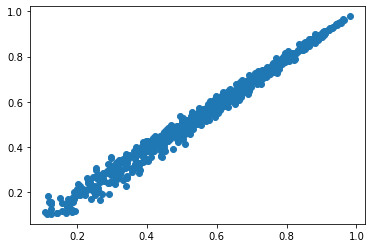

In [16]:
plt.scatter(dat1[:,0], dat1[:,1])